<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [72]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [73]:
print(yelp.shape)
yelp.head()

(10000, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [84]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# remove additional words from token
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs', 've', 'got', 'food', 'great', 'good', 'place', 'like', 'service', 'time']))

# 1) Python - ''.split
# 2) Spacy - lemmas from doc
# 3) Gensim - simple_preprocess
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [85]:
yelp['tokens'] = yelp['text'].apply(tokenize)
yelp['tokens'].head()

0    [beware, fake, fake, fake, small, business, lo...
1    [came, lunch, togo, quick, staff, friendly, co...
2    [vegas, dozens, times, stepped, foot, circus, ...
3    [went, night, closed, street, party, best, act...
4    [stars, bad, price, lunch, seniors, pay, eatin...
Name: tokens, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(yelp['text'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Print word counts
print(sparse)

  (0, 12160)	0.16663931932478315
  (0, 3838)	0.1300372770499841
  (0, 20986)	0.14874845359486788
  (0, 24944)	0.08615539205532287
  (0, 5449)	0.09336991119802791
  (0, 19656)	0.13418791178537454
  (0, 2035)	0.15752585596032637
  (0, 2565)	0.15752585596032637
  (0, 5758)	0.15752585596032637
  (0, 9429)	0.14997083955600896
  (0, 13913)	0.07920452354573587
  (0, 21267)	0.1394204861522782
  (0, 14961)	0.10820080154717121
  (0, 17744)	0.08719242890793073
  (0, 14187)	0.09299301810916012
  (0, 15250)	0.2591474699058149
  (0, 13889)	0.09240426991241127
  (0, 15472)	0.07518578980304645
  (0, 185)	0.08805056663511754
  (0, 20713)	0.07071740472259148
  (0, 11689)	0.11242414564484893
  (0, 24377)	0.04806899671941301
  (0, 26107)	0.06996468759048156
  (0, 600)	0.19189902106713735
  (0, 278)	0.19189902106713735
  :	:
  (9999, 10104)	0.06873961501152372
  (9999, 14313)	0.04728727992503466
  (9999, 11860)	0.19059474689400796
  (9999, 17521)	0.1541394681430076
  (9999, 105)	0.053341806241191204
  (999

In [13]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn = NearestNeighbors(n_neighbors=10, algorithm='auto')
nn.fit(dtm)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [14]:
my_review = ["""Shipping relatively fast, audio quality okay, battery life only last for an hour, less than the 2 hours advertised."""]

In [16]:
# Query for similar reviews of my_review
new = tfidf.transform(my_review)

nn.kneighbors(new.todense())

(array([[1.22728783, 1.2383814 , 1.26194001, 1.28034591, 1.29545926,
         1.30186773, 1.30570247, 1.30668186, 1.30868219, 1.31321179]]),
 array([[3971, 6865, 4034, 2000, 3794, 7828,   31, 5950, 5488, 6643]],
       dtype=int64))

In [19]:
# Inspect Most relevant result
for x in nn.kneighbors(new.todense())[1]:
    print(yelp['text'][x][:100])

3971    Excellent, friendly service; and they were ope...
6865    Back in this store for the 4th time! Had an iP...
4034    Dead battery on our vehicle during our first c...
2000    This is a mixed review. On the plus side they ...
3794    I was trying to find a quiet place to record s...
7828    Went in Apr 27, 2018 and JD had Travis to take...
31      Nice library.  Books and audio books for my ki...
5950    I know my review won't really matter consideri...
5488    I went there with a friend of mine who had a G...
6643    I am a loyal Pep Boys customer and I hesitate ...
Name: text, dtype: object


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [22]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [38]:
# Instances for pipeline
rfc = RandomForestClassifier()
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
sgdc = SGDClassifier()

In [39]:
# Specify the pipeline
pipe = Pipeline([('vect', vect), ('rfc', rfc)])
# pipe = Pipeline([('vect', vect), ('clf', sgdc)])
pipe.fit(yelp['text'], yelp['stars'])

C:\Users\George\.virtualenvs\DS-Unit-4-Sprint-1-NLP-Y8VMajW9\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [40]:
pipe.predict(my_review)

array([5], dtype=int64)

In [34]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (100, 500, 1000),
    'rfc__n_estimators': (20, 100, 400)
#     'clf__max_iter':(30, 10, 100)
}

gs = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
gs.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   57.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 31.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [42]:
gs.best_params_

{'rfc__n_estimators': 400,
 'vect__max_df': 0.75,
 'vect__max_features': 500,
 'vect__min_df': 0.02}

In [43]:
gs.best_score_

0.5807

In [37]:
# tfidf, sgdc - 58.2% score
gs.best_score_

0.582

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized',
                   n_iter=10)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [76]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [86]:
# A Dictionary Representation of all the words in our corpus
id2word = Dictionary(yelp['tokens'])

In [87]:
len(id2word.keys())

26462

Create a bag of words representation of the entire corpus

In [79]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [12]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=2,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [47]:
lda.print_topics()

[(0,
  '0.009*"food" + 0.009*"good" + 0.007*"great" + 0.007*"time" + 0.007*"place" + 0.006*"like" + 0.005*"service" + 0.004*"ve" + 0.004*"got" + 0.004*"definitely"'),
 (1,
  '0.012*"food" + 0.012*"good" + 0.010*"great" + 0.009*"place" + 0.009*"time" + 0.008*"like" + 0.006*"service" + 0.005*"staff" + 0.005*"ordered" + 0.004*"friendly"'),
 (2,
  '0.011*"great" + 0.010*"place" + 0.007*"food" + 0.007*"like" + 0.007*"service" + 0.007*"time" + 0.006*"good" + 0.004*"got" + 0.004*"love" + 0.004*"ve"'),
 (3,
  '0.014*"food" + 0.011*"place" + 0.008*"like" + 0.007*"great" + 0.007*"good" + 0.006*"service" + 0.006*"time" + 0.004*"got" + 0.004*"order" + 0.004*"amazing"'),
 (4,
  '0.011*"place" + 0.010*"good" + 0.010*"food" + 0.009*"service" + 0.009*"like" + 0.006*"great" + 0.006*"time" + 0.004*"ve" + 0.004*"got" + 0.004*"best"'),
 (5,
  '0.013*"good" + 0.009*"place" + 0.008*"food" + 0.008*"great" + 0.007*"like" + 0.007*"time" + 0.007*"service" + 0.006*"ve" + 0.005*"people" + 0.004*"got"'),
 (6,
  '0

In [71]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:3]) for t in words]
for n, t in enumerate(topics): 
    print(f'{n+1}. {t}')

1. place good like
2. food great place
3. great place food
4. place good food
5. good food great
6. good great time
7. time food place
8. food service great
9. food good place
10. place great food


In [49]:
import pyLDAvis.gensim
# Without removing any extreme values
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\George\.virtualenvs\DS-Unit-4-Sprint-1-NLP-Y8VMajW9\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.006949  0.000800       1        1  10.996735
1      0.000588  0.005533       2        1  10.592387
4      0.000157 -0.000809       3        1  10.136251
6     -0.001333  0.000880       4        1  10.054157
7      0.000262 -0.001580       5        1  10.019621
2     -0.000270 -0.004668       6        1   9.845283
3     -0.003654  0.001655       7        1   9.833152
5      0.001007 -0.001763       8        1   9.686569
8     -0.002448  0.000505       9        1   9.672800
0     -0.001258 -0.000553      10        1   9.163044, topic_info=     Category         Freq     Term        Total  loglift  logprob
207   Default  4078.000000    great  4078.000000  30.0000  30.0000
39    Default  4553.000000     good  4553.000000  29.0000  29.0000
143   Default  4804.000000     food  4804.000000  28.0000  28.0000
18    Default  3372.000000     like  3372.000000  27.0000  27.0000
114   Default  1818.000000       ve  1818.000000  26.0000  26.0000
...       ...          ...      ...          ...      ...      ...
45    Topic10   125.480629    staff  1512.080688  -0.0991  -5.8578
1276  Topic10   117.443497  chicken  1338.804321  -0.0436  -5.9240
734   Topic10   125.866020     love  1597.578491  -0.1510  -5.8548
309   Topic10   115.482315      try  1360.803223  -0.0767  -5.9409
206   Topic10   106.408661    going  1115.392334   0.0403  -6.0227

[865 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
13306      1  0.348814        abby
1678       1  0.179416        able
1678       2  0.117010        able
1678       3  0.080607        able
1678       4  0.093608        able
...      ...       ...         ...
13095      7  0.047406         yuk
13095      8  0.474061         yuk
13095      9  0.023703         yuk
21300      8  0.537360  とても気に入りました
21301      8  0.537420    探したお店でした

[2643 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 5, 7, 8, 3, 4, 6, 9, 1])

In [88]:
# Remove extreme values from the dataset
id2word.filter_extremes(no_below=20, no_above=0.85)
len(id2word.keys())

2907

In [89]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

In [90]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

In [91]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:3]) for t in words]
for n, t in enumerate(topics): 
    print(f'{n+1}. {t}')

1. nice best friendly
2. people nice best
3. chicken best menu
4. best order chicken
5. amazing went love
6. best definitely love
7. order ordered best
8. came order nice
9. staff day little
10. restaurant experience ordered


In [92]:
import pyLDAvis.gensim
# After removing extreme values from the dataset
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\George\.virtualenvs\DS-Unit-4-Sprint-1-NLP-Y8VMajW9\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.001701  0.003747       1        1  10.121703
7     -0.001465  0.002600       2        1  10.095450
2     -0.006428  0.001300       3        1  10.051132
4     -0.002408 -0.002734       4        1  10.048973
5     -0.001598 -0.003112       5        1  10.021778
0     -0.000492 -0.000441       6        1  10.004846
6      0.001701  0.002649       7        1   9.969365
9      0.003712 -0.001618       8        1   9.938791
1      0.002892  0.002392       9        1   9.926832
8      0.002385 -0.004782      10        1   9.821133, topic_info=    Category         Freq        Term        Total  loglift  logprob
303  Default  1514.000000       order  1514.000000  30.0000  30.0000
337  Default  1168.000000      better  1168.000000  29.0000  29.0000
152  Default  1371.000000     amazing  1371.000000  28.0000  28.0000
27   Default  1394.000000    friendly  1394.000000  27.0000  27.0000
16   Default   918.000000     minutes   918.000000  26.0000  26.0000
..       ...          ...         ...          ...      ...      ...
145  Topic10   104.793373   recommend  1172.152100  -0.0940  -5.8283
88   Topic10   113.397255        went  1493.419067  -0.2573  -5.7494
100  Topic10   104.950867      people  1448.295898  -0.3040  -5.8268
240  Topic10   104.993088         try  1459.402710  -0.3113  -5.8264
205  Topic10    99.683510  experience  1303.918213  -0.2505  -5.8783

[826 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2470      1  0.165160  absolute
2470      2  0.088932  absolute
2470      3  0.076228  absolute
2470      4  0.101637  absolute
2470      5  0.101637  absolute
...     ...       ...       ...
91        6  0.099335     young
91        7  0.099335     young
91        8  0.091694     young
91        9  0.091694     young
91       10  0.114617     young

[4860 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 3, 5, 6, 1, 7, 10, 2, 9])

In [30]:
from collections import Counter

def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    total_docs = len(docs)
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [31]:
wc = count(yelp['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
137,food,3363,5071,1.0,0.010624,0.010624,0.3363
123,place,3385,4832,2.0,0.010123,0.020747,0.3385
47,good,3228,4806,3.0,0.010069,0.030816,0.3228
213,great,3101,4297,4.0,0.009002,0.039818,0.3101
44,service,2987,3695,5.0,0.007741,0.047559,0.2987


In [32]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

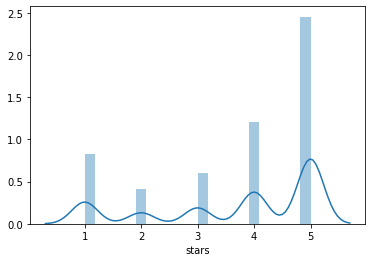

In [33]:
sns.distplot(yelp['stars']);

In [34]:
wc_1 = count(yelp[yelp['stars'] == 1]['tokens'])
wc_top20_1 = wc_1[wc_1['rank'] <= 20]

wc_2 = count(yelp[yelp['stars'] == 2]['tokens'])
wc_top20_2 = wc_2[wc_2['rank'] <= 20]

wc_3 = count(yelp[yelp['stars'] == 3]['tokens'])
wc_top20_3 = wc_3[wc_3['rank'] <= 20]

wc_4 = count(yelp[yelp['stars'] == 4]['tokens'])
wc_top20_4 = wc_4[wc_4['rank'] <= 20]

wc_5 = count(yelp[yelp['stars'] == 4]['tokens'])
wc_top20_5 = wc_5[wc_5['rank'] <= 20]

Top 20 words in each rating


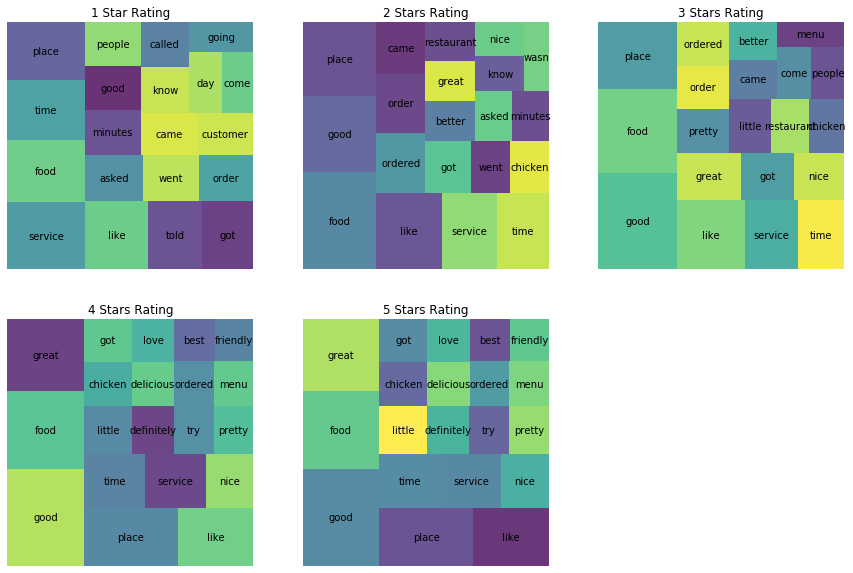

In [35]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
print('Top 20 words in each rating')
# axis = axis.flatten()
squarify.plot(sizes=wc_top20_1['pct_total'], label=wc_top20_1['word'], alpha=.8, ax=ax[0][0])
ax[0][0].set_title("1 Star Rating")
ax[0][0].axis('off')
squarify.plot(sizes=wc_top20_2['pct_total'], label=wc_top20_2['word'], alpha=.8, ax=ax[0][1])
ax[0][1].set_title("2 Stars Rating")
ax[0][1].axis('off')
squarify.plot(sizes=wc_top20_3['pct_total'], label=wc_top20_3['word'], alpha=.8, ax=ax[0][2])
ax[0][2].set_title("3 Stars Rating")
ax[0][2].axis('off')
squarify.plot(sizes=wc_top20_4['pct_total'], label=wc_top20_4['word'], alpha=.8, ax=ax[1][0])
ax[1][0].set_title("4 Stars Rating")
ax[1][0].axis('off')
squarify.plot(sizes=wc_top20_5['pct_total'], label=wc_top20_5['word'], alpha=.8, ax=ax[1][1])
ax[1][1].set_title("5 Stars Rating")
ax[1][1].axis('off')
ax[1][2].set_visible(False)
plt.show()

In [52]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    tokens = list(yelp['tokens'])
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = yelp['tokens']
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [53]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=yelp['tokens'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=40)

KeyboardInterrupt: 

In [ ]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence);

## Analysis on the results of your topic model

- All reviews from 1-5 stars mention the word "good", while 2+ stars reviews have the word "good" in top 2 occurence.
- 1 star reivews mention "service" the most and likely gave bad rating partly due to bad service.
- Lots of topics have similar tokens, which makes sense since most reviews are about resturants that revolves around food.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)